In [1]:
from PIL import Image
import pandas as pd
import numpy as np
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
ourGenre = 'Music'

In [3]:
data = pd.read_csv(f"../GenresCSV/{ourGenre}.csv")
data

,Unnamed: 0,imdbID,Genre
0,0,tt0080684,0
1,1,tt0080684,0
2,2,tt0080684,0
3,3,tt0080377,0
4,4,tt0080377,0
...,...,...,...
1107,1107,tt3707114,1
1108,1108,tt3272570,1
1109,1109,tt3837248,1
1110,1110,tt4669204,1


In [4]:
genre = []
poster = []

In [5]:
for i in range(len(data)):
    tempImage = Image.open(f"../Posters100x100/{data['imdbID'][i]}.jpg")
    poster.append(np.array(tempImage))
    genre.append(data['Genre'][i])

In [6]:
print(len(genre))
print(len(poster))
print(len(poster[0]))
print(len(poster[0][0]))
print(len(poster[0][0][0]))

1112
1112
100
100
3


In [7]:
GenreStrings = [f"Not {ourGenre}", f"{ourGenre}"]

In [8]:
for i in range(len(poster) -1, -1 ,-1):
    if poster[i].shape != (100,100,3): 
        #some posters didnt have 100,100,3 so we deleted them
        genre.pop(i)
        poster.pop(i)
        
print(len(genre))

1112


In [9]:
X_train, X_test, y_train, y_test = train_test_split(poster, genre, test_size=0.1)

In [10]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1000
1000
112
112


In [11]:
X_train = np.array(X_train) #turn them into numpy arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (1000, 100, 100, 3)
1000 train samples
112 test samples


In [13]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print (y_train.shape)
print(y_test.shape)
print (y_train)
print (y_train[0])

(1000, 2)
(112, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[0. 1.]


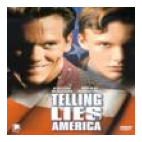

[0. 1.]
Music


In [14]:
index = 50
plt.figure(figsize=(20, 4))
# original
plt.subplot(2, 10, 1)
# plt.figure(figsize = (15,2))
plt.imshow(X_train[index].reshape(100, 100,3))
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()
print(y_train[index])
print(GenreStrings[np.argmax(y_train[index])])

In [15]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(len(GenreStrings), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dropout (Dropout)           (None, 20000)             0

In [16]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])

In [17]:
# Loads the weights
checkpoint_path = f"../Weights/{GenreStrings[1]}/cp.ckpt"
model.load_weights(checkpoint_path)
# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

4/4 - 3s - loss: 0.3521 - accuracy: 0.8929 - 3s/epoch - 858ms/step
Restored model, accuracy: 89.29%


In [18]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
7/7 [==============================] - 38s 4s/step - loss: 0.4377 - accuracy: 0.8075 - val_loss: 0.3671 - val_accuracy: 0.8500
Epoch 2/5
7/7 [==============================] - 26s 4s/step - loss: 0.3783 - accuracy: 0.8687 - val_loss: 0.3536 - val_accuracy: 0.8650
Epoch 3/5
7/7 [==============================] - 30s 4s/step - loss: 0.3353 - accuracy: 0.8687 - val_loss: 0.3074 - val_accuracy: 0.9000
Epoch 4/5
7/7 [==============================] - 29s 4s/step - loss: 0.2881 - accuracy: 0.8938 - val_loss: 0.2899 - val_accuracy: 0.9100
Epoch 5/5
7/7 [==============================] - 50s 8s/step - loss: 0.2547 - accuracy: 0.9225 - val_loss: 0.2648 - val_accuracy: 0.8950


(112, 2)


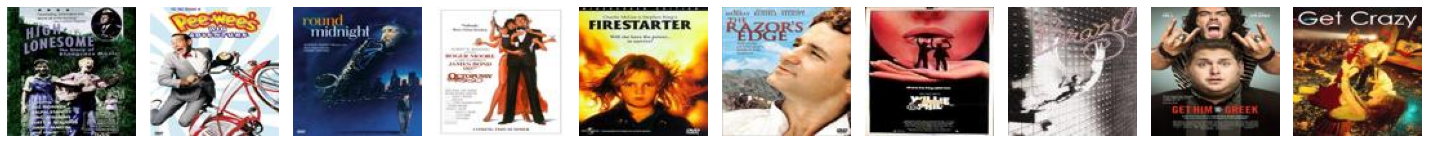

[0.03616089 0.9638391 ]
1
Genre is Music Predicted is Music ([0.03616089 0.9638391 ])
Genre is Not Music Predicted is Not Music ([0.94797015 0.0520298 ])
Genre is Music Predicted is Music ([0.17016107 0.82983893])
Genre is Not Music Predicted is Not Music ([0.9648663  0.03513373])
Genre is Not Music Predicted is Not Music ([0.8059093  0.19409072])
Genre is Not Music Predicted is Not Music ([0.792226   0.20777395])
Genre is Not Music Predicted is Not Music ([0.92967516 0.07032479])
Genre is Not Music Predicted is Not Music ([0.8020674  0.19793259])
Genre is Music Predicted is Music ([0.1319175 0.8680825])
Genre is Music Predicted is Music ([0.01877014 0.9812299 ])


In [19]:
# Compare original images with Predicted ones
decoded_imgs1 = model.predict(X_test)
offset = 0
decoded_imgs1= decoded_imgs1[offset:]
print(decoded_imgs1.shape)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    # plt.figure(figsize = (15,2))
    plt.imshow(X_test[i+offset].reshape(100, 100,3))
    plt.gray()
    plt.axis('off')
plt.tight_layout()
plt.show()
print(decoded_imgs1[0])
print(np.argmax(decoded_imgs1[0]))
for i in range(10):
  print(f"Genre is {GenreStrings[np.argmax(y_test[i+offset])]} Predicted is {GenreStrings[np.argmax(decoded_imgs1[i])]} ({decoded_imgs1[i+offset]})")

In [20]:
#Evaluate the trained model
#Should have test and train genres equal
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.2f}%".format(score[0]*100))
print("Test Accuracy:  {:.2f}%".format(score[1]*100))

4/4 [==============================] - 2s 193ms/step - loss: 0.2765 - accuracy: 0.9107
Test Loss: 27.65%
Test Accuracy:  91.07%


In [21]:
model.save_weights(checkpoint_path)